# Tarea 2 

## Descripción del problema

El problema planteado a resolver, corresponde a poder identificar si a partir de un conjunto de factores, se puede identificar si una persona presentará un derrame cerebral. Esto mediante un set de datos previamente recolectados donde viene el conjunto de factores, además de una columna que indica si la persona con los factores dados tuvo un derrame o no. El problema corresponde a uno de clasificación.

### Ubicación del dataset

El dataset se puede encontrar en el presente [link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

## Exploración de datos

Para realizar la exploración de los datos, se hará uso de *OpenRefine* y la función *describe* que ofrece *pandas* para poder observar información sobre un conjunto de datos, además de otras funciones para visualizar los comportamientos de los datos.

Lo primero a identificar, es que hay datos tanto categóricos (género, hipertensión, enfermedades del corazón, se ha casado, tipo de trabajo y lugar de residencia), como numéricos (edad, nivel de glucosa, índice de masa corporal).

Al realizar el análisis de datos exploratorio sobre las columnas del dataset, se hará uso de las técnicas de estadística descriptiva y de gráficos para realizar una inspección visual de los elementos.

### Estadística descriptiva

Esta estadística consiste en realizar el resumen del valor mínimo, primer cuartil, mediana, tercer cuartil y valor máximo para cada columna numérica del dataset. Al realizarlo, podemos observar:

#### Edad

Para la columna de edad, se puede identificar:
- Valor mínimo: 10
- Primer cuartil: 34
- Mediana: 50
- Tercer cuartil: 63
- Valor máximo: 82

#### Nivel promedio de glucosa

Para la columna de nivel promedio de glucosa, se puede identificar:
- Valor mínimo: 55
- Primer cuartil: 77
- Mediana: 92
- Tercer cuartil: 116
- Valor máximo: 271


#### Índice de masa corporal

Para la columna de índice de masa corporal, se puede identificar:
- Valor mínimo: 11.5
- Primer cuartil: 25.3
- Mediana: 29.1
- Tercer cuartil: 34.1
- Valor máximo: 92

In [254]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr
%matplotlib inline

data = pd.read_csv('healthcare-dataset-stroke-data-clean-v2.csv', index_col=0)
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,0.609051,48.652555,0.119124,0.060146,0.758832,0.559708,0.509489,108.311670,30.292350,0.459270,0.052555
std,0.488034,18.850018,0.323982,0.237792,0.427854,0.845556,0.499983,47.706754,7.295778,0.498411,0.223175
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,0.000000,77.230000,25.300000,0.000000,0.000000
50%,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,1.000000,92.350000,29.100000,0.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,1.000000,1.000000,116.200000,34.100000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [2]:
data['age']            = data['age'].astype(np.uint8)
data['gender']         = data['gender'].astype(np.uint8)
data['Residence_type'] = data['Residence_type'].astype(np.uint8)
data['smoking_status'] = data['smoking_status'].astype(np.uint8)
data['work_type']      = data['work_type'].astype(np.uint8)

A partir del análisis mediante la estadística descriptiva, podemos observar la distribución de los datos con respecto a los atributos de edad, nivel de glucosa e índice de masa corporal. Se dice que alguien presenta sobrepeso si este valor se encuentra entre 25 y 30 $\frac{kg}{m^2}$ y es obeso si este valor es superior a 30 $\frac{kg}{m^2}$. Al ver los datos, se nota que la mayoría de los casos corresponden a personas que se encuentran en estas categorías, ya que solo el una cuarta parte de los datos es inferior a 25 $\frac{kg}{m^2}$. 

Además, para el nivel de glucosa en la sangre, al consultarle a mi hermana que estudia medicina, me indicó que el nivel de glucosa en la sangre en ayunas, debe estar por debajo de 100 $\frac{mg}{dl}$. Podemos observar en el conjunto de datos, que la mitad de los datos se encuentran por debajo de los 92$\frac{mg}{dl}$, por lo que menos de la mitad de los individuos del conjunto de datos presentan un nivel alto. 

### Particionar en clases

Una técnica que se puede usar para la exploración de datos en este caso, es particionarlos en clases, en este caso, sería interesante particionarlos en género (masculino o femenino). 

In [3]:
male_group = data[data['gender'] == 0]
female_group = data[data['gender'] == 1]

In [4]:
male_group.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,1339.0,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.0,49.701270,0.134429,0.090366,0.768484,0.575803,0.501120,112.489305,30.422405,0.515310,0.056012
std,0.0,18.891249,0.341240,0.286812,0.421959,0.865834,0.500186,50.504107,6.593894,0.499952,0.230031
min,0.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220000,11.500000,0.000000,0.000000
25%,0.0,35.500000,0.000000,0.000000,1.000000,0.000000,0.000000,78.505000,26.300000,0.000000,0.000000
50%,0.0,52.000000,0.000000,0.000000,1.000000,0.000000,1.000000,94.650000,29.500000,1.000000,0.000000
75%,0.0,64.000000,0.000000,0.000000,1.000000,1.000000,1.000000,122.605000,33.600000,1.000000,0.000000
max,0.0,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [5]:
female_group.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,2086.0,2086.000000,2086.00000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.0,47.979386,0.10930,0.040748,0.752637,0.549377,0.514861,105.630053,30.208869,0.423298,0.050336
std,0.0,18.797215,0.31209,0.197753,0.431583,0.832325,0.499899,45.632459,7.713120,0.494200,0.218689
min,1.0,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,0.000000,0.000000
25%,1.0,33.000000,0.00000,0.000000,1.000000,0.000000,0.000000,76.310000,24.600000,0.000000,0.000000
50%,1.0,48.000000,0.00000,0.000000,1.000000,0.000000,1.000000,91.005000,28.700000,0.000000,0.000000
75%,1.0,62.750000,0.00000,0.000000,1.000000,1.000000,1.000000,112.975000,34.375000,1.000000,0.000000
max,1.0,82.000000,1.00000,1.000000,1.000000,4.000000,1.000000,267.760000,78.000000,1.000000,1.000000


Al particionar el conjunto de datos a partir de la variable de clasificación "género", podemos observar primeramente, que el grupo de personas de género femenino es mucho mayor que el del género masculino. En lo que respecta a la edad, ambos grupos están practicamente iguales, con algunas diferencias aunque mínimas. Al observar los niveles de glucosa, se puede notar que los valores para hombres son en general, un poco mayores a los de mujeres, al presentar valores superiores en todos los quantiles. Por último, para el índice de masa corporal, se puede observar que sin contar el valor máximo, los índices son similares para ambos grupos.

### Plots

Se visualizará los datos mediante gráficos para poder entender la distribución y observar si se encuentran valores extremos o patrones en la distribución.

<AxesSubplot:title={'center':'bmi'}, xlabel='smoking_status'>

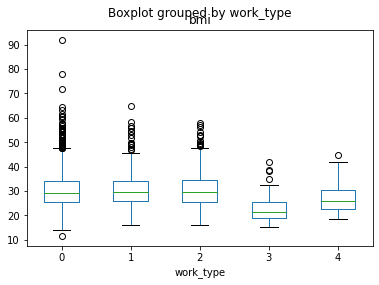

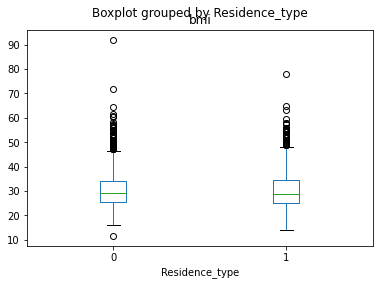

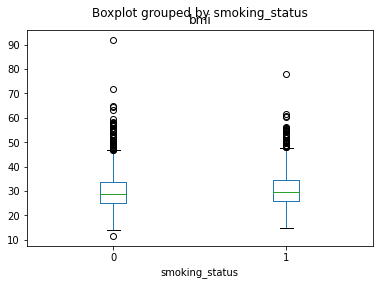

In [6]:
data.boxplot(by ='work_type', column =['bmi'], grid = False)
data.boxplot(by ='Residence_type', column =['bmi'], grid = False)
data.boxplot(by ='smoking_status', column =['bmi'], grid = False)

<AxesSubplot:title={'center':'avg_glucose_level'}, xlabel='smoking_status'>

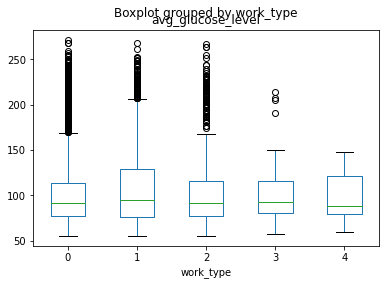

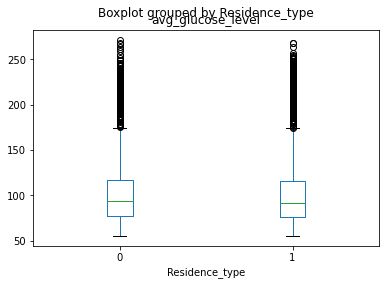

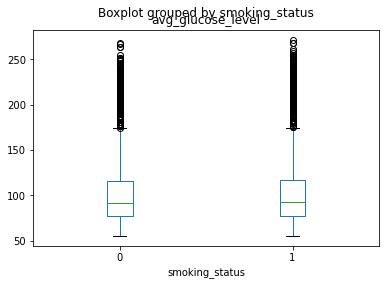

In [7]:
data.boxplot(by ='work_type', column =['avg_glucose_level'], grid = False)
data.boxplot(by ='Residence_type', column =['avg_glucose_level'], grid = False)
data.boxplot(by ='smoking_status', column =['avg_glucose_level'], grid = False)

Al observar los datos, se puede observar cómo al agrupar los datos de diversas formas para observar los niveles de glucosa y de porcentaje de masa corporal, en la mayoría de datos, la distribución de los datos es similar entre los diferentes grupos, con excepción de la variable categórica *work_type*, donde hay una mayor variabilidad en los resultados de los grupos. Otra cualidad que se nota en estos diagramas, es la presencia de una gran cantidad de valores extremos, por lo que es algo que tomar en cuenta a la hora de realizar los modelos.

## Técnicas de preprocesamiento y limpieza de datos



Los cambios realizados mediante *OpenRefine* se adjuntan en el *changes.json*. Estos fueron:
- Eliminar algunos elementos que presentaban variables que no aportaban nada en la columna de *smoking_status*, habían elementos cuyo valor era *unknown*, lo cual no aporta nada a la investigación.  
- Eliminar algunos elementos que presentaban variables que no aportaban nada en la columna de *bmi*, donde habían elementos cuyo valor era *N/A*, por lo que estos también se eliminaron.

Estos cambios se aplicaron previo a realizar la exploración de datos, por lo que no se aprecian estos valores incorrectos.
Ahora, como se notaron tantos valores extremos, se eliminarán utilizando la regla del 1.5*IQR*.

In [256]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
data=data[~((data['bmi']<(Q1-1.5*IQR)) | (data['bmi']>(Q3+1.5*IQR)))]

Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
data= data[~((data['avg_glucose_level']<(Q1-1.5*IQR)) | (data['avg_glucose_level']>(Q3+1.5*IQR)))]

data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000
mean,0.616955,46.783391,0.092734,0.046021,0.737370,0.555017,0.510035,91.696785,29.247889,0.455017,0.039792
std,0.486213,18.722698,0.290109,0.209566,0.440139,0.856582,0.499986,23.264813,6.093369,0.498059,0.195505
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.827500,24.800000,0.000000,0.000000
50%,1.000000,47.000000,0.000000,0.000000,1.000000,0.000000,1.000000,88.175000,28.500000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,1.000000,103.927500,32.900000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,173.960000,47.300000,1.000000,1.000000


Como se puede observar, ahora, los datos presentan mucho menos valores extremos, donde el *bmi* máximo pasó de 92 a 47 y el *avg_glucose_level* pasó de 267 a 174. Ahora, se dispone de un conjunto de datos mucho más limpio y normal.

## Transformación de datos, selección y extracción de atributos 

Como se muestra en el archivo *changes.json*, las columnas:
- age
- heart_disease
- hypertension
- avg_glucose_level
- bmi
- stroke

### Cambios

- Todas las columnas se pasaron a datos numéricos, con valores que permitieran identificar los originales (por ejemplo, en la columna de casado, el sí pasa a ser 1 y el no, 0, o en la columna de género, el masculino pasa a ser 0 y el femenino 1). Esto con el fin de que sea más facil su manipulación a la hora de realizar el modelo.
- Para la columna de smoking status, se unió las columnas de formerly smoked con la de smokes para así, hacerlo binario. Esto debido a que se notaron resultados similares al dividir el dataset en ambos grupos, además de que en sí, es algo muy ambiguo (no se sabe hace cuanto las personas que fumaron dejaron de fumar, ni la cantidad de lo que fumaron al compararla con los que fuman).


## Algoritmos a implementar

Para esta tarea los siguientes dos modelos serán utilizados para poder predecir si alguien tendrá un derrame cerebral a partir de un conjunto de factores: 
- *Decision Tree* 
- *Deep Neural Network*. 

Inicialmente, se probarán ambos con los hiperparámetros por defecto y luego, se verá si cambiarlos pueden generar un modelo más completo y certero.

### Árbol de decisión

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from numpy import arange


#Se elimina el identificador de cada individuo para X, además de no seleccionar la columna de resultados
X, y = data.values[:, :-1], data.values[:, -1]


#Se divide el set de datos en los de entrenamiento y los de prueba
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    train_size=0.7, 
                                                    random_state=42)

model_dt = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)
n_scores = cross_val_score(model_dt, 
                           X, 
                           y, 
                           scoring='accuracy',
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')
print('Accuracy: %.2f (%.2f)' % (mean(n_scores*100), std(n_scores*100)))
model_dt = RandomForestClassifier(n_jobs=1)
model_dt.fit(X, y)

Accuracy: 95.99 (0.25)


RandomForestClassifier(n_jobs=1)

Sepuede observar que el modelo tiene una certeza del 95.99% y posee una desviación estandar de 0.25, por lo que se puede observar que tiene una alta tasa de correctitud.

### Deep Neural Network

In [229]:
from keras.models import Sequential
from keras.layers import Dense

X, y = data.values[:, :-1], data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    train_size=0.7, 
                                                    random_state=42)
# Se crea el modelo keras de red neuronal profunda y se añaden las capas
model_nn = Sequential()
model_nn.add(Dense(12, 
                input_dim=10, 
                activation='relu'))
model_nn.add(Dense(8, 
                activation='relu'))
model_nn.add(Dense(1, 
                activation='sigmoid'))
#Se compila el modelo. Como al igual que el ejercicio de la clase, corresponde a un clasificador de enfermedades, 
# entonces lo hice similar, ajustando la capa de entrada para los parametros.
model_nn.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_nn.fit(X, 
          y, 
          epochs=150, 
          batch_size=10)


Epoch 1/150
289/289 [==============================] - 0s 601us/step - loss: 0.4674 - accuracy: 0.9277
Epoch 2/150
289/289 [==============================] - 0s 566us/step - loss: 0.1663 - accuracy: 0.9592
Epoch 3/150
289/289 [==============================] - 0s 627us/step - loss: 0.1641 - accuracy: 0.9602
Epoch 4/150
289/289 [==============================] - 0s 564us/step - loss: 0.1600 - accuracy: 0.9599
Epoch 5/150
289/289 [==============================] - 0s 540us/step - loss: 0.1647 - accuracy: 0.9595
Epoch 6/150
289/289 [==============================] - 0s 540us/step - loss: 0.1591 - accuracy: 0.9602
Epoch 7/150
289/289 [==============================] - 0s 562us/step - loss: 0.1595 - accuracy: 0.9602
Epoch 8/150
289/289 [==============================] - 0s 535us/step - loss: 0.1566 - accuracy: 0.9602
Epoch 9/150
289/289 [==============================] - 0s 611us/step - loss: 0.1573 - accuracy: 0.9602
Epoch 10/150
289/289 [==============================] - 0s 549us/step - l

In [245]:
_, accuracy = model_nn.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

91/91 [==============================] - 0s 539us/step - loss: 0.1337 - accuracy: 0.9602
Accuracy: 96.02


### Comparación

Se puede observar que el modelo de red neuronal fue ligeramente mejor que el del árbol de decisión, obteniendo una precisión del 96.02% contra una del 95.99%.

## Evaluación de modelos

### Evaluación del árbol de decisión

Para evaluar el modelo, se utilizarán las técnicas de *repeated stratified k-fold cross validation* y *nested cross validation*.

#### Repeated stratified k-fold

In [195]:
def get_models():
    models = dict()
    depths = [i for i in range(1,8)] + [None]
    n_trees = [10, 50, 100, 500]
    for n in n_trees:
        for d in depths:
            for i in range(1,8):

                    models[str(str(n)+","+str(d)+","+ str(i))] = RandomForestClassifier(max_depth=d, 
                                                                                        n_estimators=n,
                                                                                        max_features=i)
    return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model_dt, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores*100), std(scores*100)))

>10,1,1 96.01 (0.19)
>10,1,2 95.96 (0.21)
>10,1,3 96.00 (0.17)
>10,1,4 96.00 (0.19)
>10,1,5 96.01 (0.23)
>10,1,6 95.97 (0.19)
>10,1,7 96.00 (0.26)
>10,2,1 95.97 (0.21)
>10,2,2 96.02 (0.17)
>10,2,3 96.00 (0.25)
>10,2,4 95.99 (0.25)
>10,2,5 96.01 (0.23)
>10,2,6 95.97 (0.21)
>10,2,7 95.99 (0.19)
>10,3,1 95.99 (0.23)
>10,3,2 96.00 (0.23)
>10,3,3 95.97 (0.21)
>10,3,4 95.99 (0.19)
>10,3,5 95.97 (0.21)
>10,3,6 96.03 (0.17)
>10,3,7 96.00 (0.23)
>10,4,1 95.99 (0.19)
>10,4,2 96.03 (0.19)
>10,4,3 96.01 (0.19)
>10,4,4 96.00 (0.17)
>10,4,5 96.02 (0.17)
>10,4,6 95.96 (0.21)
>10,4,7 96.01 (0.17)
>10,5,1 96.01 (0.17)
>10,5,2 96.01 (0.17)
>10,5,3 96.04 (0.21)
>10,5,4 96.02 (0.19)
>10,5,5 96.02 (0.25)
>10,5,6 95.99 (0.21)
>10,5,7 96.01 (0.21)
>10,6,1 96.04 (0.21)
>10,6,2 95.99 (0.23)
>10,6,3 95.99 (0.21)
>10,6,4 96.00 (0.19)
>10,6,5 96.01 (0.17)
>10,6,6 95.96 (0.21)
>10,6,7 96.02 (0.25)
>10,7,1 96.00 (0.19)
>10,7,2 95.97 (0.21)
>10,7,3 95.99 (0.23)
>10,7,4 95.97 (0.21)
>10,7,5 95.97 (0.21)
>10,7,6 96.01

In [217]:
print('Accuracy: %.2f (%.3f)' % (mean(results )*100, std(results)*100))

Accuracy: 96.00 (0.208)


Como se puede ver, el mejor resultado posible corresponde a utilizar algo cercano a 50 arboles, una profundidad de 5,y un número de caracteristicas de 1, lo que otorga una tasa de precisión del 96.04% y una desviación estandar de 0.19 (Este número varía en cada ejecución, pero utilizar estos parámetros otorgan el mejor resultado de forma más constante.

#### Nested cross-validation

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cv_outer = KFold(n_splits=10, 
                 shuffle=True, 
                 random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    cv_inner = KFold(n_splits=3, 
                     shuffle=True, 
                     random_state=1)
    model_dt = RandomForestClassifier(random_state=1)
    space = dict()
    space['n_estimators'] = [10, 50, 100, 500]
    space['max_features'] = [i for i in range(1,8)]

    search = GridSearchCV(model_dt, 
                          space, 
                          scoring='accuracy', 
                          cv=cv_inner, 
                          refit=True)

    result = search.fit(X_train, y_train)

    best_model = result.best_estimator_

    yhat = best_model.predict(X_test)

    acc = accuracy_score(y_test, yhat)

    outer_results.append(acc)

    print('>acc=%.2f, est=%.2f, cfg=%s' % (acc*100, result.best_score_*100, result.best_params_))
print('Accuracy: %.2f (%.2f)' % (mean(outer_results)*100, std(outer_results)*100))

>acc=94.46, est=96.04, cfg={'max_features': 3, 'n_estimators': 10}
>acc=95.85, est=95.96, cfg={'max_features': 4, 'n_estimators': 50}
>acc=97.92, est=95.73, cfg={'max_features': 2, 'n_estimators': 50}
>acc=96.54, est=95.96, cfg={'max_features': 3, 'n_estimators': 500}
>acc=95.50, est=96.04, cfg={'max_features': 1, 'n_estimators': 500}
>acc=96.19, est=96.04, cfg={'max_features': 2, 'n_estimators': 100}
>acc=94.81, est=96.16, cfg={'max_features': 2, 'n_estimators': 10}
>acc=95.85, est=96.08, cfg={'max_features': 1, 'n_estimators': 100}
>acc=95.50, est=96.08, cfg={'max_features': 1, 'n_estimators': 50}
>acc=96.89, est=95.92, cfg={'max_features': 1, 'n_estimators': 50}
Accuracy: 95.95 (0.95)


Se puede observar que al aplicar el *nested cross-validation*, el promedio de la precisión del modelo al utilizar 2 como máximo número de características y 50 estimadores fue de 97.92, mejorando el modelo considerablemente, obteniendo un mejor valor que el original y que el obtenido utilizando repeated stratified k-fold.

### Evaluación de la red neuronal

#### Stratified k-fold cross validation

In [222]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


X, y = data.values[:, :-1], data.values[:, -1]

X = X.astype('float32')

y = LabelEncoder().fit_transform(y)

kfold = StratifiedKFold(15, 
                        shuffle=True, 
                        random_state=1)

scores = list()
names_2 = list()
counter = 1
for train_ix, test_ix in kfold.split(X, y):

    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]

    n_features = X.shape[1]

    model_nn = Sequential()
    model_nn.add(Dense(12, 
                    input_dim=10, 
                    activation='relu'))
    model_nn.add(Dense(8, 
                    activation='relu'))
    model_nn.add(Dense(1, 
                    activation='sigmoid'))

    model_nn.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    model_nn.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)

    yhat = (model_nn.predict(X_test) > 0.5).astype("int32")

    score = accuracy_score(y_test, yhat)
    print('>%.2f' % (score*100))
    scores.append(score)
    names_2.append(str(counter))
    counter = counter + 1

print('Mean Accuracy: %.2f (%.2f)' % (mean(scores)*100, std(scores)*100))

>95.85
>95.85
>95.85
>95.85
>95.85
>95.85
>95.85
>95.85
>95.85
>95.85
>96.35
>96.35
>96.35
>96.35
>96.35
Mean Accuracy: 96.02 (0.24)


### Comparación de resultados

Como se puede observar en el siguiente gráfico, los resultados obtenidos al utilizar un árbol de decisión no cambian mucho entre las diversas ejecuciones del algoritmo con los diversos parámetros. 

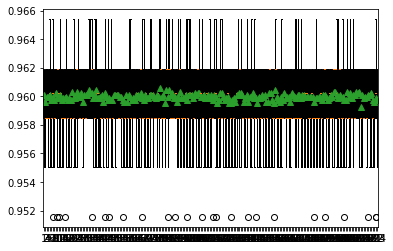

In [235]:
from matplotlib import pyplot

pyplot.boxplot(results,
               showmeans=True)
pyplot.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24ccb61cfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ccb62d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ccb61ca90>],
 'medians': [<matplotlib.lines.Line2D at 0x24ccb62d370>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cbed047c0>],
 'means': [<matplotlib.lines.Line2D at 0x24cbed042b0>]}

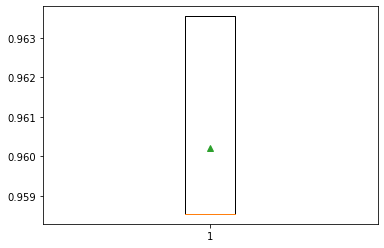

In [236]:
pyplot.boxplot(scores, 
              showmeans=True)

Al comparar los resultados obtenidos al utilizar el árbol de decisión con los obtenidos al utilizar la red neuronal, se pueden observar unos resultados similares, al punto en que no se puede asegurar que un modelo es mejor que el otro para este caso en particular. 

Tanto la red neuronal como el árbol de decisión tienen una precisión cercana al 96.02%, la cual corresponde a un número extremadamente alto, indicando que ambos modelos pueden resolver el problema de averiguar si alguien tendrá un derrame cerebral a partir de los parámetros con un alto grado de precisión. Las preciciones y desviaciones estandar de ambos modelos se resumen en la siguiente tabla:

|                     | Árbol de decisión      | Red neuronal |
|-----------          | ----------- | ----------- |
| Precisión (promedio)              | 96.00  | 96.02|
| Desviación estándar (promedio)    |0.208   | 0.208|
| Precisión (mejor caso)            |96.04   | 96.35|

{'whiskers': [<matplotlib.lines.Line2D at 0x24cd3becc70>,
 'caps': [<matplotlib.lines.Line2D at 0x24cd3bec1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ccb390b50>,
 'medians': [<matplotlib.lines.Line2D at 0x24cbc04dc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x24cdcf31ca0>,
 'means': [<matplotlib.lines.Line2D at 0x24cbc04d160>,
  <matplotlib.lines.Line2D at 0x24cbdc3b280>]}

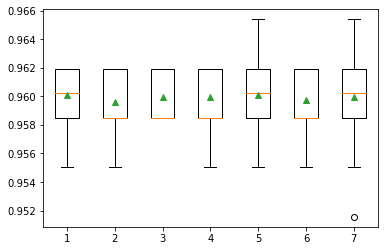

In [239]:
pyplot.boxplot(results[0:7], showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c97c3c610>,
 'caps': [<matplotlib.lines.Line2D at 0x24c96a4b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c97c3cee0>,
 'medians': [<matplotlib.lines.Line2D at 0x24c97d1da00>,
 'fliers': [<matplotlib.lines.Line2D at 0x24c97d1d5e0>,
 'means': [<matplotlib.lines.Line2D at 0x24c97d1dcd0>,
  <matplotlib.lines.Line2D at 0x24c97b84700>]}

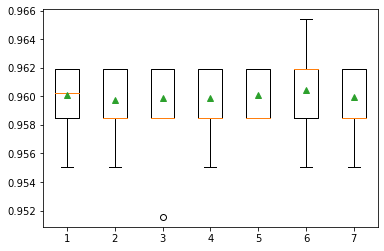

In [242]:
pyplot.boxplot(results[0:49:7], showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c97dbad00>,
 'caps': [<matplotlib.lines.Line2D at 0x24c97dbadf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c97c53cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x24cde19c9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24cde19cac0>,
 'means': [<matplotlib.lines.Line2D at 0x24cde19c940>,
  <matplotlib.lines.Line2D at 0x24c97c951f0>]}

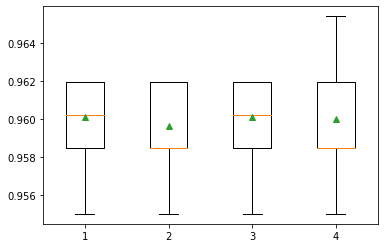

In [243]:
pyplot.boxplot(results[0:-1:56], showmeans=True)

 ## Atributos más importantes
 
 A partir de los datos recopilados, se puede concluir que los atributos más importantes de los modelos obtenidos son:
 
 - Número de árboles: Se puede ver un poco en el boxplot dibujado para el número de árboles que conforme se aumenta el número de árboles en el modelo, el rendimiento aumenta, aunque sea mínimo.
 - Número de características: Se puede observar como un número de características de 4 o 5 genera una mayor precisión.
 - Número de niveles: Se puede observar que con un número de cerca de 5 niveles permite las predicciones con menor desviación.